In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("retail_sales_dataset.csv")

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.shape

(1000, 9)

In [8]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [25]:
df.dtypes

transaction_id                int64
date                 datetime64[ns]
customer_id                  object
gender                       object
age                           int64
product_category             object
quantity                      int64
price_per_unit                int64
total_amount                  int64
calculated_amount             int64
month                        object
dtype: object

# Data Preprocessing

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [17]:
df = df.drop_duplicates()

In [18]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [19]:
category_distribution = df['Product Category'].value_counts()

In [39]:
df['Month']  =  pd.DatetimeIndex(df['Date']).month

month_label =   {1.0:'Jan', 2.0:'Feb',3.0 :'Mar', 4.0:'April',
5.0:  'May',  6.0: 'June', 7.0: 'July',  8.0:  'Aug',
9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

df['MONTH']=df['MONTH'].map(month_label)

In [24]:

df.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount,calculated_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,559.997632


In [38]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,MONTH,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Nov,25–34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Feb,25–34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Jan,45–54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,35–44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,25–34


In [26]:

df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

In [27]:

Age_bins = [18, 24, 34, 44, 54, 64]
Age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64']
df['Age Group'] = pd.cut(df['Age'], bins=Age_bins, labels=Age_labels, right=True)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,MONTH,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Nov,25–34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Feb,25–34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Jan,45–54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,35–44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,25–34


# Data Visualizations


In [28]:
category_revenue = df.groupby(["Gender", "Product Category"])["Total Amount"].sum().reset_index()


In [31]:
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')
df = df.dropna(subset=['Total Amount', 'Gender', 'Product Category'])
spending_summary= df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()
spending_summary


,Product Category,Gender,Total Amount
0,Beauty,Female,74830
1,Beauty,Male,68685
2,Clothing,Female,81275
3,Clothing,Male,74305
4,Electronics,Female,76735
5,Electronics,Male,80170


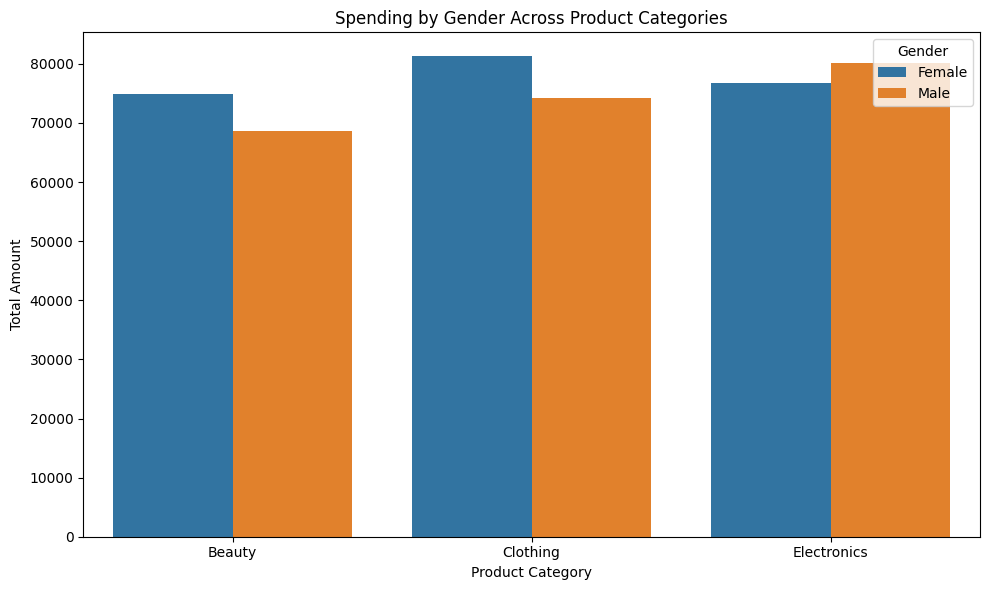

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=spending_summary, x='Product Category', y='Total Amount', hue='Gender')

plt.title('Spending by Gender Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

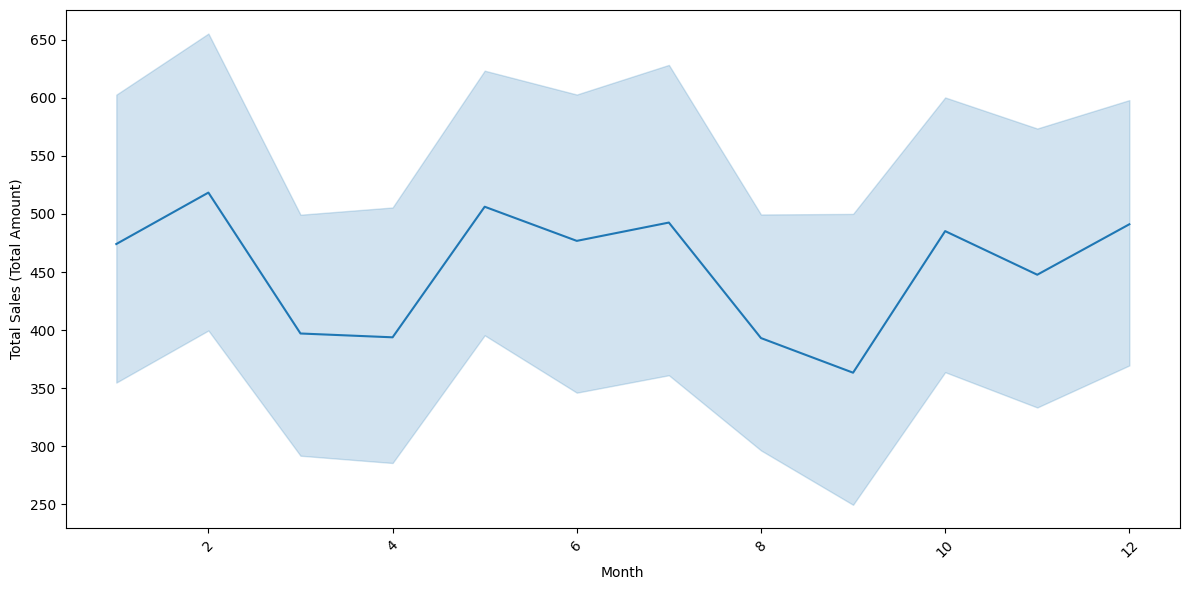

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Total Amount')

plt.xlabel('Month')
plt.ylabel('Total Sales (Total Amount)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

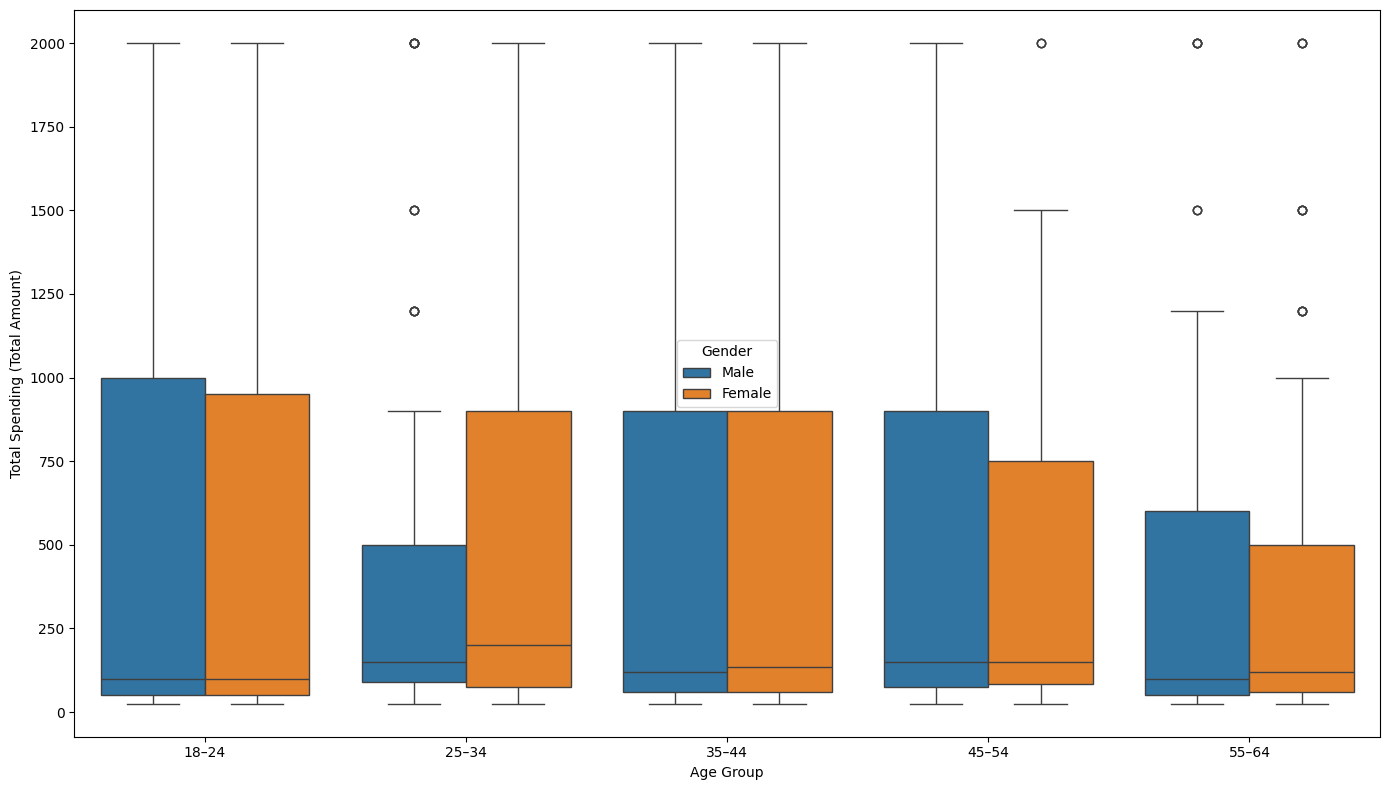

In [41]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='Age Group', y='Total Amount', hue='Gender')

plt.xlabel('Age Group')
plt.ylabel('Total Spending (Total Amount)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

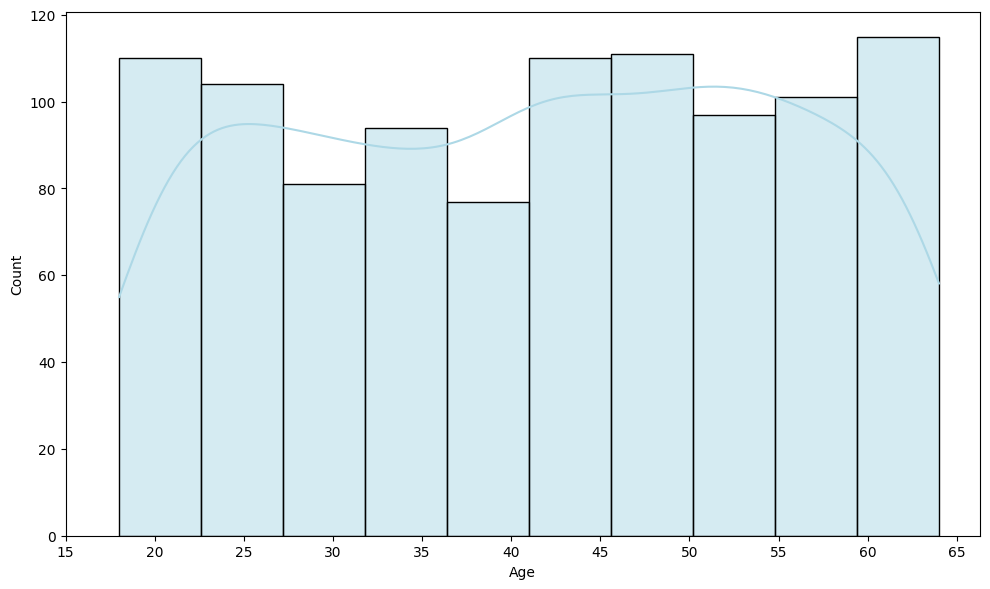

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='lightblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(15, 70, 5))
plt.tight_layout()
plt.show()

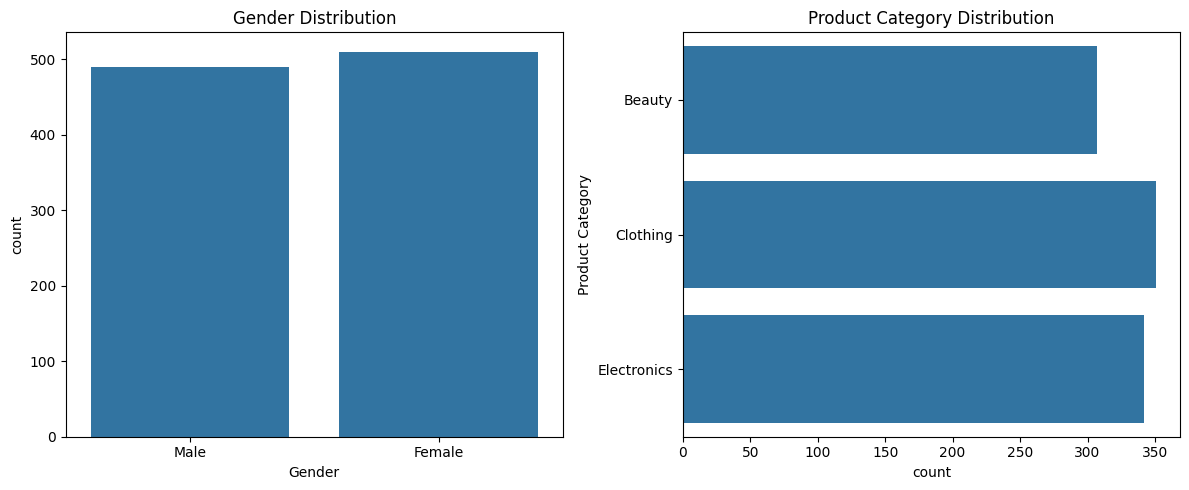

In [44]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")

plt.subplot(1,2,2)
sns.countplot(y="Product Category", data=df)
plt.title("Product Category Distribution")
plt.tight_layout()
plt.show()

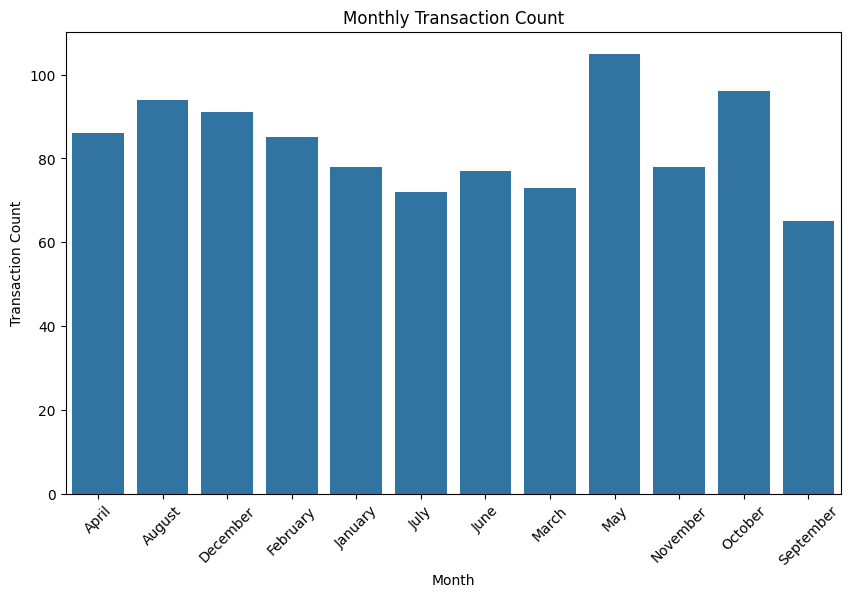

In [46]:

df["Month"] = df["Date"].dt.month_name()

transaction_count = df.groupby("Month")["Transaction ID"].count()

plt.figure(figsize=(10,6))
sns.barplot(x=transaction_count.index, y=transaction_count.values)

plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.title("Monthly Transaction Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21412\623711209.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_qty = df.groupby(["Age Group", "Product Category"])["Quantity"].mean().reset_index()


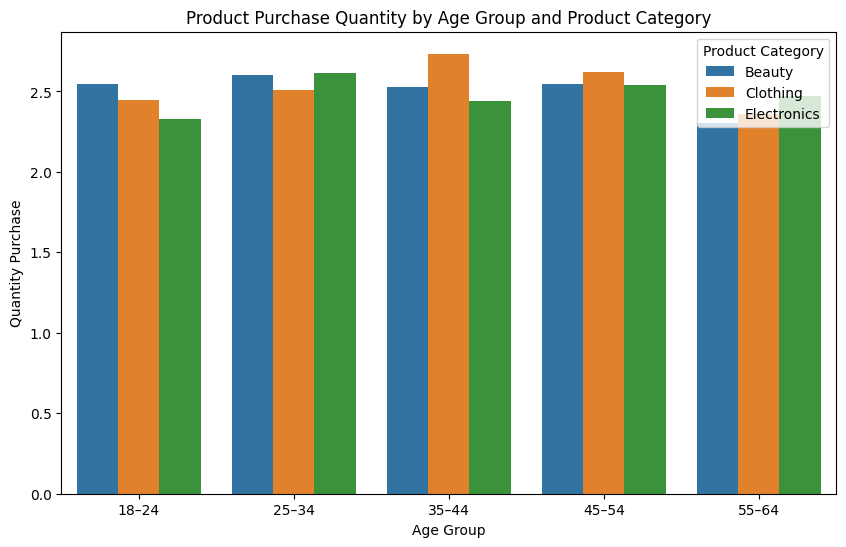

In [48]:
age_product_qty = df.groupby(["Age Group", "Product Category"])["Quantity"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Age Group", y="Quantity", hue="Product Category", data=age_product_qty)

plt.title("Product Purchase Quantity by Age Group and Product Category")
plt.ylabel("Quantity Purchase")
plt.xlabel("Age Group")
plt.legend(title="Product Category")
plt.show()



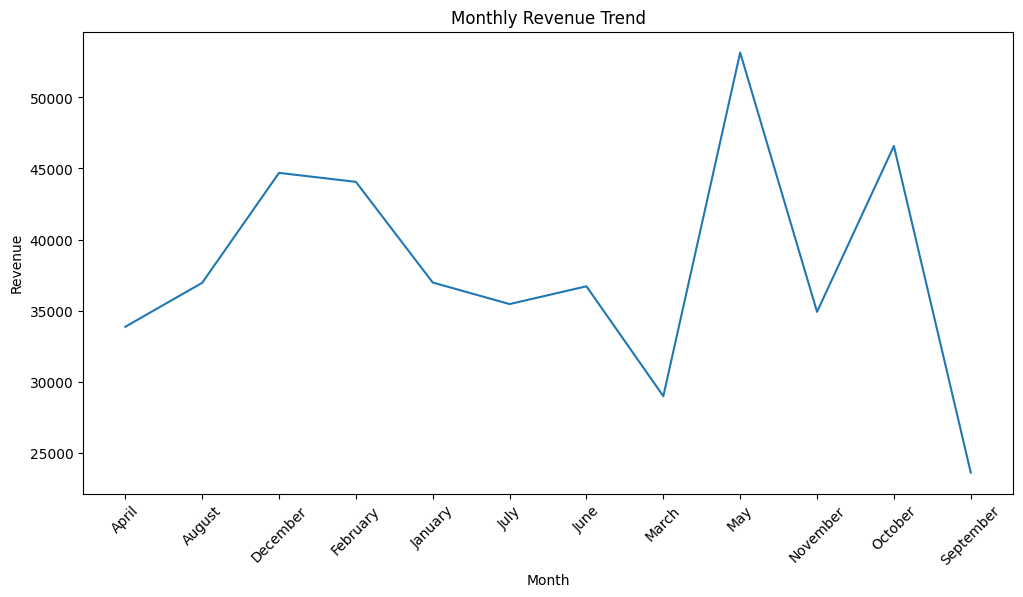

In [50]:
df["Revenue"] = df["Quantity"] * df["Price per Unit"]

monthly_revenue = df.groupby(df["Date"].dt.month_name())["Revenue"].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()

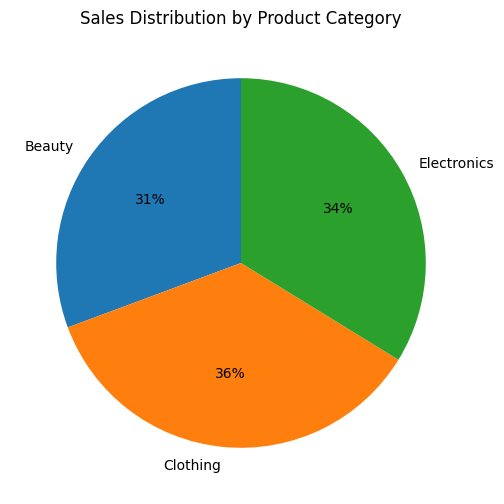

In [51]:
category_sales = df.groupby("Product Category")["Quantity"].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.0f%%', startangle=90)
plt.title("Sales Distribution by Product Category")
plt.show()

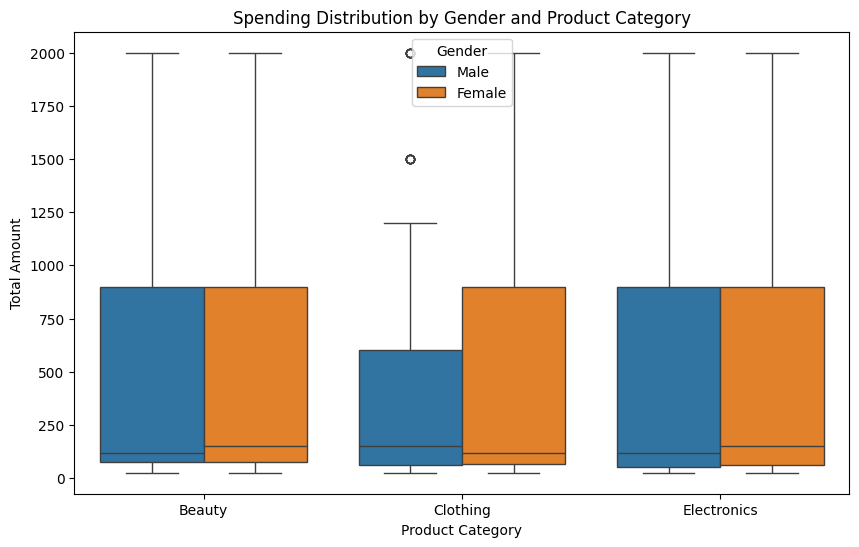

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Product Category",
    y="Total Amount",
    hue="Gender"
)

plt.title("Spending Distribution by Gender and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.legend(title="Gender")
plt.show()

In [77]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

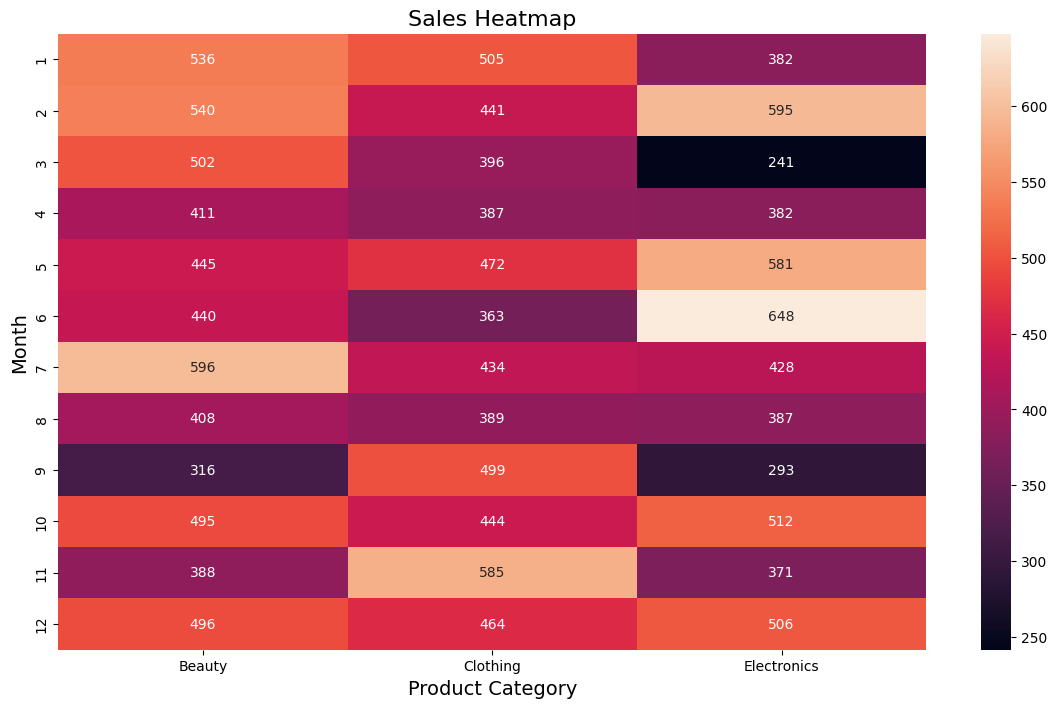

In [79]:
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21412\4227634909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_21412\4227634909.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


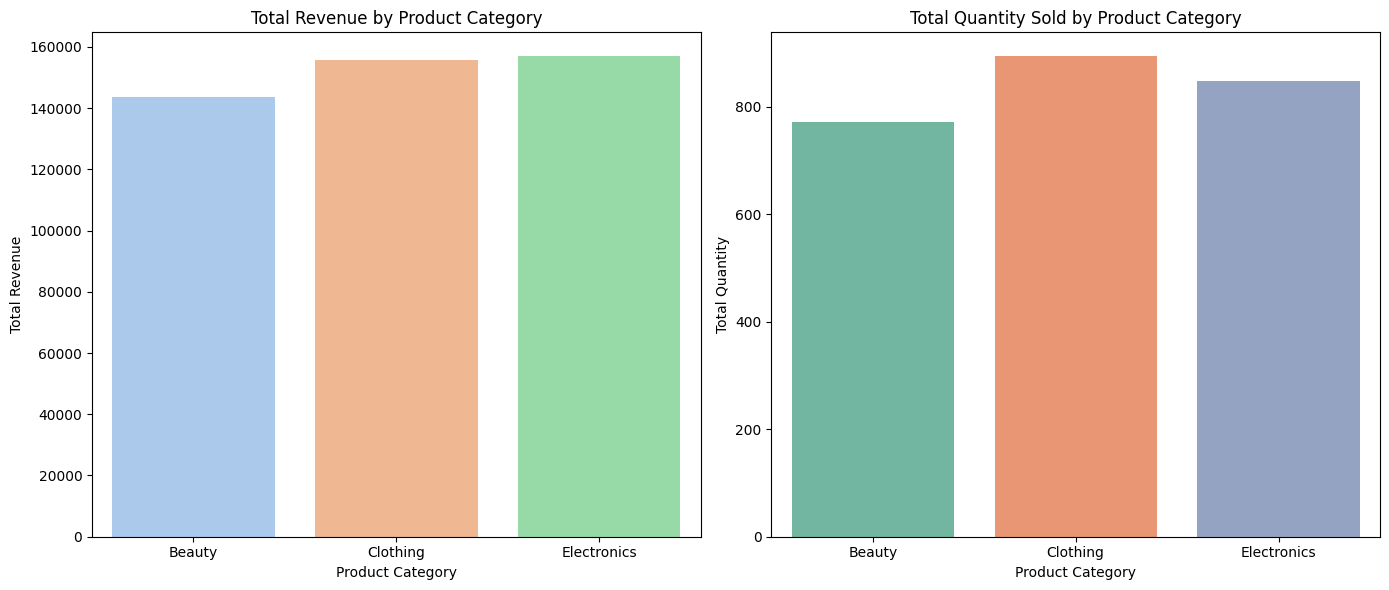

In [57]:

revenue = df.groupby("Product Category")["Total Amount"].sum().reset_index()
quantity = df.groupby("Product Category")["Quantity"].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(
    data=revenue,
    x="Product Category",
    y="Total Amount",
    ax=axes[0],
    palette="pastel"
)
axes[0].set_title("Total Revenue by Product Category")
axes[0].set_xlabel("Product Category")
axes[0].set_ylabel("Total Revenue")

sns.barplot(
    data=quantity,
    x="Product Category",
    y="Quantity",
    ax=axes[1],
    palette="Set2"
)
axes[1].set_title("Total Quantity Sold by Product Category")
axes[1].set_xlabel("Product Category")
axes[1].set_ylabel("Total Quantity")

plt.tight_layout()
plt.show()


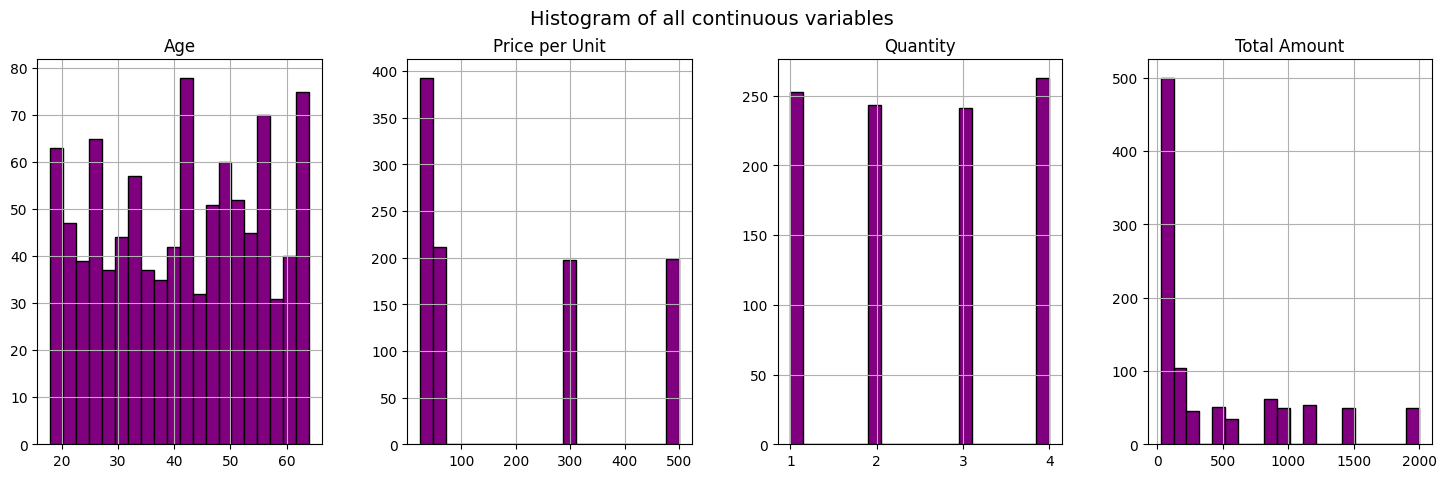

In [ ]:

cols = ['Age', 'Price per Unit', 'Quantity', 'Total Amount']

df[cols].hist(
    bins=20,
    color="purple",
    edgecolor="black",
    figsize=(18,5),
    layout=(1,4)  
)

plt.suptitle("Histogram of all continuous variables", fontsize=14)
plt.show()
